# Agrupamento na base de dados de jogadores do FIFA 2019

Esta base de dados contém 89 atributos de 18.2K jogadores de futebol da edição 2019 do FIFA. 

Link para a base de dados no Kaggle: https://www.kaggle.com/karangadiya/fifa19

Foram usadas as características técnicas dos jogadores, além da altura e peso com o objetivo de agrupá-los em um determinado perfil usando KMeans

Curso: Machine Learning para Competições Kaggle - curso 2 (Udemy)

## Importação das bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

## Carregar a base de dados

In [2]:
# carrega a base de dados que está em formato csv
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
## tamanho do banco de dados
df.shape

(18207, 89)

In [4]:
## Lista todas as colunas
for i, column in enumerate(df.columns):
    print(i, column)

0 Unnamed: 0
1 ID
2 Name
3 Age
4 Photo
5 Nationality
6 Flag
7 Overall
8 Potential
9 Club
10 Club Logo
11 Value
12 Wage
13 Special
14 Preferred Foot
15 International Reputation
16 Weak Foot
17 Skill Moves
18 Work Rate
19 Body Type
20 Real Face
21 Position
22 Jersey Number
23 Joined
24 Loaned From
25 Contract Valid Until
26 Height
27 Weight
28 LS
29 ST
30 RS
31 LW
32 LF
33 CF
34 RF
35 RW
36 LAM
37 CAM
38 RAM
39 LM
40 LCM
41 CM
42 RCM
43 RM
44 LWB
45 LDM
46 CDM
47 RDM
48 RWB
49 LB
50 LCB
51 CB
52 RCB
53 RB
54 Crossing
55 Finishing
56 HeadingAccuracy
57 ShortPassing
58 Volleys
59 Dribbling
60 Curve
61 FKAccuracy
62 LongPassing
63 BallControl
64 Acceleration
65 SprintSpeed
66 Agility
67 Reactions
68 Balance
69 ShotPower
70 Jumping
71 Stamina
72 Strength
73 LongShots
74 Aggression
75 Interceptions
76 Positioning
77 Vision
78 Penalties
79 Composure
80 Marking
81 StandingTackle
82 SlidingTackle
83 GKDiving
84 GKHandling
85 GKKicking
86 GKPositioning
87 GKReflexes
88 Release Clause


In [5]:
## seleciona as colunas 21, 26, 27, e de 54 até 83, que são as colunas dos atributos dos jogadores que serão utilizadas
columns = [21, 26, 27]
columns += range(54, 83)

In [6]:
print(columns)

[21, 26, 27, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]


In [7]:
## Atualiza nosso ddf com apenas as colunas que serão usadas
df = df.iloc[:, columns]

In [8]:
df.head()

,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,RF,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,ST,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,LW,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,GK,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,RCM,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


In [9]:
# Lista as colunas
for i, column in enumerate(df.columns):
    print(i, column)

0 Position
1 Height
2 Weight
3 Crossing
4 Finishing
5 HeadingAccuracy
6 ShortPassing
7 Volleys
8 Dribbling
9 Curve
10 FKAccuracy
11 LongPassing
12 BallControl
13 Acceleration
14 SprintSpeed
15 Agility
16 Reactions
17 Balance
18 ShotPower
19 Jumping
20 Stamina
21 Strength
22 LongShots
23 Aggression
24 Interceptions
25 Positioning
26 Vision
27 Penalties
28 Composure
29 Marking
30 StandingTackle
31 SlidingTackle


## Tratando os valores faltantes

In [10]:
# Vê a quantidade de missing values em cada coluna
df.isna().sum(axis = 0)

Position           60
Height             48
Weight             48
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
dtype: int64

In [11]:
len(df)

18207

In [12]:
len(df.dropna())

18147

In [13]:
# Apagandos os 60 registros faltantes, pois equivalem a apenas 0,3% das base total
df = df.dropna()

In [14]:
## novo tamanho da base de dados
df.shape

(18147, 32)

In [15]:
# Checa se ainda há valores faltantes
df.isna().sum(axis= 0)

Position           0
Height             0
Weight             0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
dtype: int64

## Inspecionando as estatísticas

In [16]:
# função definida para plotar o histograma e o boxplot
def hist_boxplot(feature):
    fig, ax = plt.subplots(1, 2)
    ax[0].hist(feature)
    ax[1].boxplot(feature)

In [17]:
df_describe = df.describe()
df_describe

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,...,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,49.738414,45.550229,52.300766,58.695432,42.912217,55.375158,47.176283,42.866038,52.721386,58.374828,...,47.113187,55.876068,46.702761,49.962198,53.407781,48.546371,58.651127,47.286053,47.701879,45.666336
std,18.364255,19.527445,17.381753,14.696075,17.695900,18.912224,18.396009,17.480034,15.325211,16.685643,...,19.263142,17.366534,20.697462,19.530469,14.146594,15.703113,11.437138,19.900450,21.663630,21.287961
min,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000
25%,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,...,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000
50%,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000
75%,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000


In [18]:
df_describe.loc['min']

Crossing            5.0
Finishing           2.0
HeadingAccuracy     4.0
ShortPassing        7.0
Volleys             4.0
Dribbling           4.0
Curve               6.0
FKAccuracy          3.0
LongPassing         9.0
BallControl         5.0
Acceleration       12.0
SprintSpeed        12.0
Agility            14.0
Reactions          21.0
Balance            16.0
ShotPower           2.0
Jumping            15.0
Stamina            12.0
Strength           17.0
LongShots           3.0
Aggression         11.0
Interceptions       3.0
Positioning         2.0
Vision             10.0
Penalties           5.0
Composure           3.0
Marking             3.0
StandingTackle      2.0
SlidingTackle       3.0
Name: min, dtype: float64

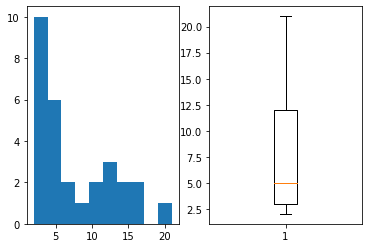

In [19]:
hist_boxplot(df_describe.loc['min'])

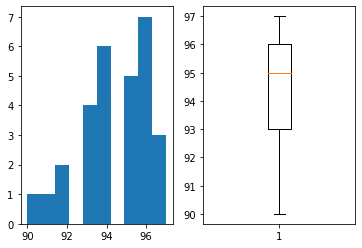

In [20]:
hist_boxplot(df_describe.loc['max']) 

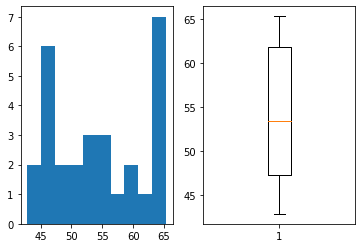

In [21]:
hist_boxplot(df_describe.loc['mean'])

## Tratamento da altura do jogador

In [22]:
df.dtypes

Position            object
Height              object
Weight              object
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
Composure          float64
Marking            float64
StandingTackle     float64
SlidingTackle      float64
dtype: object

In [23]:
df['Height'].head(50)

0      5'7
1      6'2
2      5'9
3      6'4
4     5'11
5      5'8
6      5'8
7      6'0
8      6'0
9      6'2
10     6'0
11     6'0
12     6'2
13     5'8
14     5'6
15    5'10
16     6'2
17     5'9
18     6'2
19     6'6
20     6'2
21     6'1
22     6'4
23     5'8
24     6'2
25    5'10
26     5'9
27     6'1
28    5'11
29     5'4
30     5'9
31    5'11
32     5'8
33     6'2
34     6'3
35     5'9
36     6'1
37     6'2
38     6'1
39     6'0
40     6'4
41     6'4
42     6'0
43    5'11
44     6'2
45     6'4
46     6'1
47     6'3
48     6'1
49     5'7
Name: Height, dtype: object

In [24]:
df['Height'] = df['Height'].str.split('\'')
df['Height']

0         [5, 7]
1         [6, 2]
2         [5, 9]
3         [6, 4]
4        [5, 11]
          ...   
18202     [5, 9]
18203     [6, 3]
18204     [5, 8]
18205    [5, 10]
18206    [5, 10]
Name: Height, Length: 18147, dtype: object

In [25]:
df['Height'] = [30.48* int(elem[0]) + 2.54 * int(elem[1]) for elem in df['Height']]
df['Height']

0        170.18
1        187.96
2        175.26
3        193.04
4        180.34
          ...  
18202    175.26
18203    190.50
18204    172.72
18205    177.80
18206    177.80
Name: Height, Length: 18147, dtype: float64

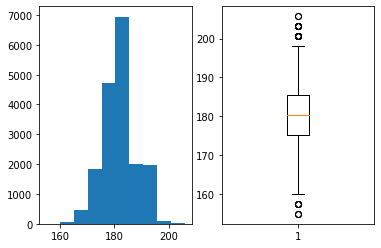

In [26]:
hist_boxplot(df['Height'])

## Preparação peso dos jogadores

In [27]:
df['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [28]:
## Converter peso de libras para kg
df['Weight'] = df['Weight'].str.split('l')
df['Weight']

0        [159, bs]
1        [183, bs]
2        [150, bs]
3        [168, bs]
4        [154, bs]
           ...    
18202    [134, bs]
18203    [170, bs]
18204    [148, bs]
18205    [154, bs]
18206    [176, bs]
Name: Weight, Length: 18147, dtype: object

In [ ]:
df['Weight'] = [int(elem[0])*0.453 for elem in df['Weight']]
df['Weight']

In [ ]:
hist_boxplot(df['Weight'])

## Preparação da base de dados para agrupamento

In [ ]:
position = np.array(df['Position'])
print(position)

In [ ]:
np.unique(position, return_counts = True)

In [ ]:
df = df.drop(['Position'], axis = 1)
df.head()

In [ ]:
scaler = MinMaxScaler()
df_train = scaler.fit_transform(df)

In [ ]:
type(df_train)

In [ ]:
 df_train[0]

## Agrupamento com K-Means

### Escolha do número de clusters com WCSS

In [ ]:
wcss = []
K = range(1,12)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_train)
    wcss.append(km.inertia_)

In [ ]:
wcss

In [ ]:
plt.plot(K, wcss, 'bx-')
plt.xlabel('Numero de Clusters')
plt.ylabel('wcss')
plt.title('Elbow Methos for Optimal K')

### Redução da dimensionalidade com PCA (Principal Component Analysis)